In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pylossmap import BLMDataFetcher
from pylossmap.utils import to_datetime
from pylossmap.utils import row_from_time

/home/lcoyle/.config/miniconda3/envs/loss_maps/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
import logging
logging.getLogger('pylossmap').setLevel(logging.INFO)

# recreating comissioning loss maps

In [4]:
ts = [
      {'datetime': '2018-04-13 00:51:26', 'plane': 'V', 'beam': 2},
#       {'datetime': '2018-04-18 20:13:29', 'plane': 'V', 'beam': 2},
      
#       {'datetime': '2018-04-13 00:49:23', 'plane': 'H', 'beam': 1},
    
#       {'datetime': '2017-09-23 08:55:50', 'plane': 'H', 'beam': 1},
      
#       {'datetime': '2018-04-14 20:47:05', 'plane': 'V', 'beam': 1},
#       {'datetime': '2017-09-22 19:41:58', 'plane': 'V', 'beam': 1},
      
#       {'datetime': '2018-04-13 00:50:04', 'plane': 'V', 'beam': 1},
#       {'datetime': '2017-09-23 08:57:25', 'plane': 'V', 'beam': 1},
      
#       {'datetime': '2018-04-13 00:51:02', 'plane': 'H', 'beam': 2},
#       {'datetime': '2017-09-23 08:59:53', 'plane': 'H', 'beam': 2},
     ]
look_back = pd.Timedelta('20S')
look_forward = pd.Timedelta('20S')

In [5]:
fetcher = BLMDataFetcher()

INFO:pylossmap.fetcher:Using BLM metadata from 2018-02-01 10:00:00+01:00.


Beam mode INJPHYS
04-13 00:51:06 ▶04-13 00:51:46


INFO:pylossmap.fetcher:Using BLM metadata from 2018-02-01 10:00:00+01:00.
INFO:pylossmap.fetcher:Using BLM metadata from 2018-02-01 10:00:00+01:00.


Beam mode INJPHYS
04-13 00:50:37 ▶04-13 00:51:01


/home/lcoyle/.config/miniconda3/envs/loss_maps/lib/python3.7/site-packages/pandas/core/indexes/base.py:3071: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  target = np.asarray(target)


,data,dcum,type
blm,,,
BLMTI.06R7.B2I10_TCP.B6R7.B2,0.610255,2019427,coll
BLMTI.06R7.B2I10_TCP.C6R7.B2,1.000000,2019627,coll
BLMTI.06R7.B2I10_TCP.D6R7.B2,0.512209,2019827,coll


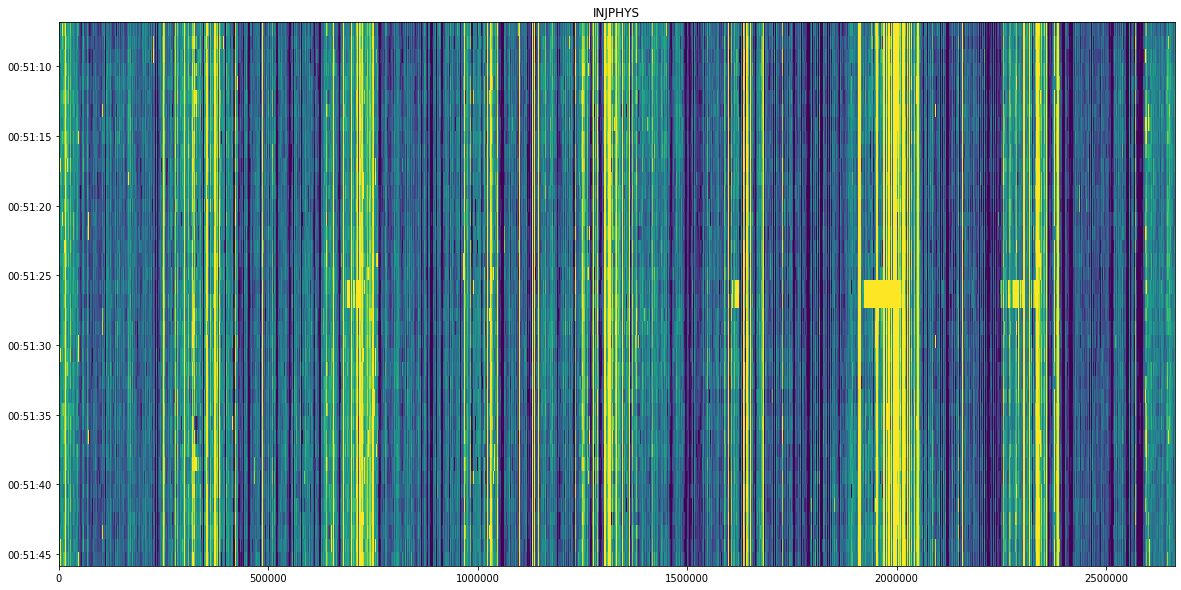

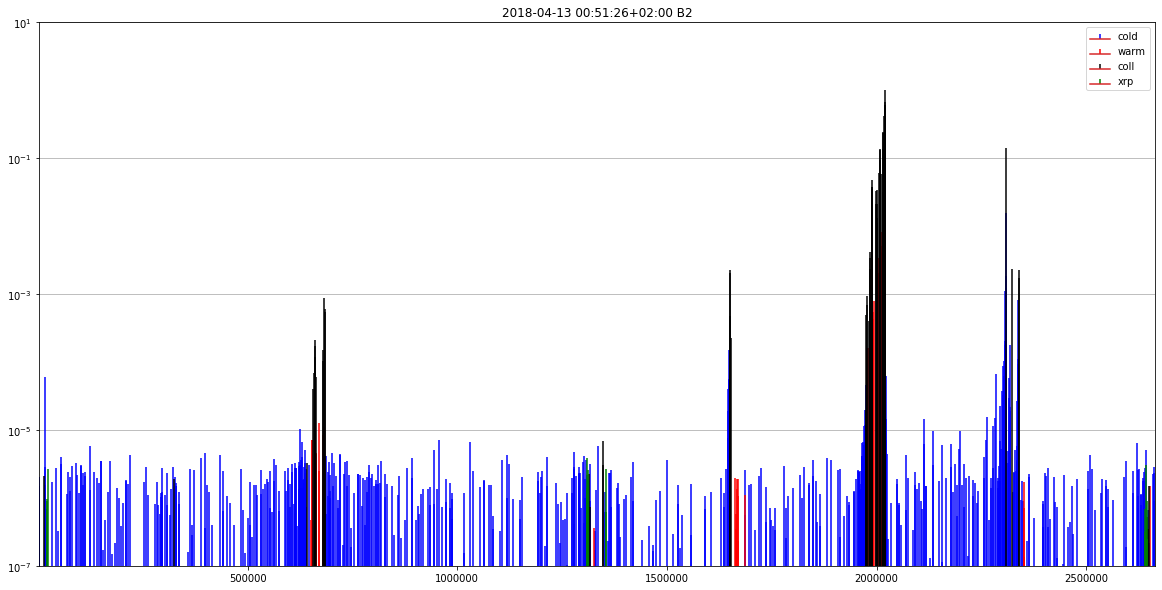

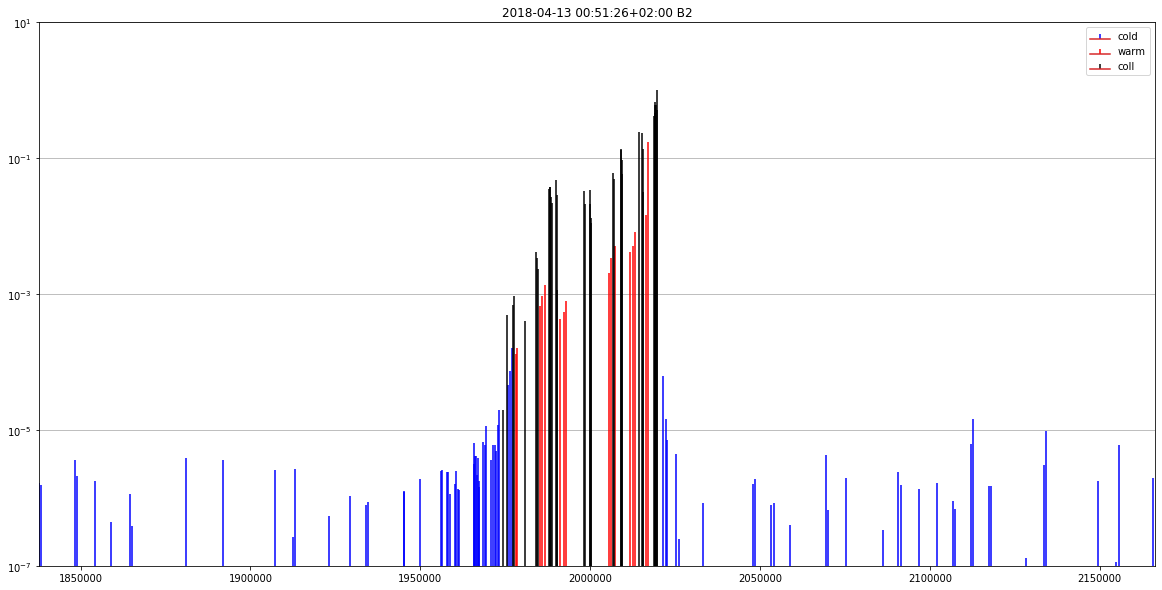

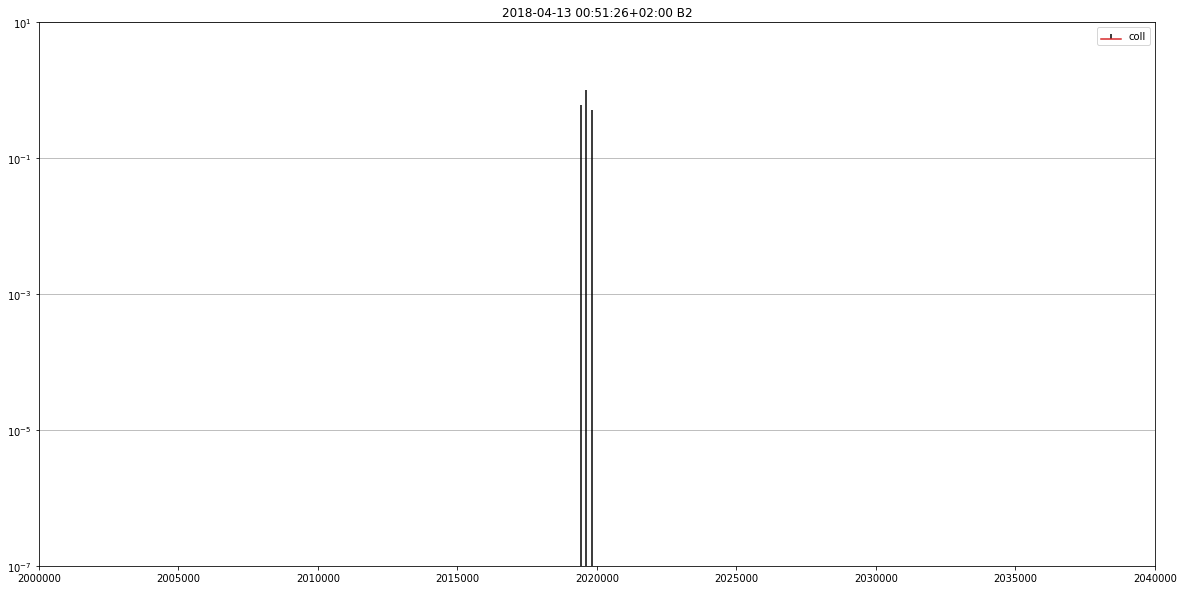

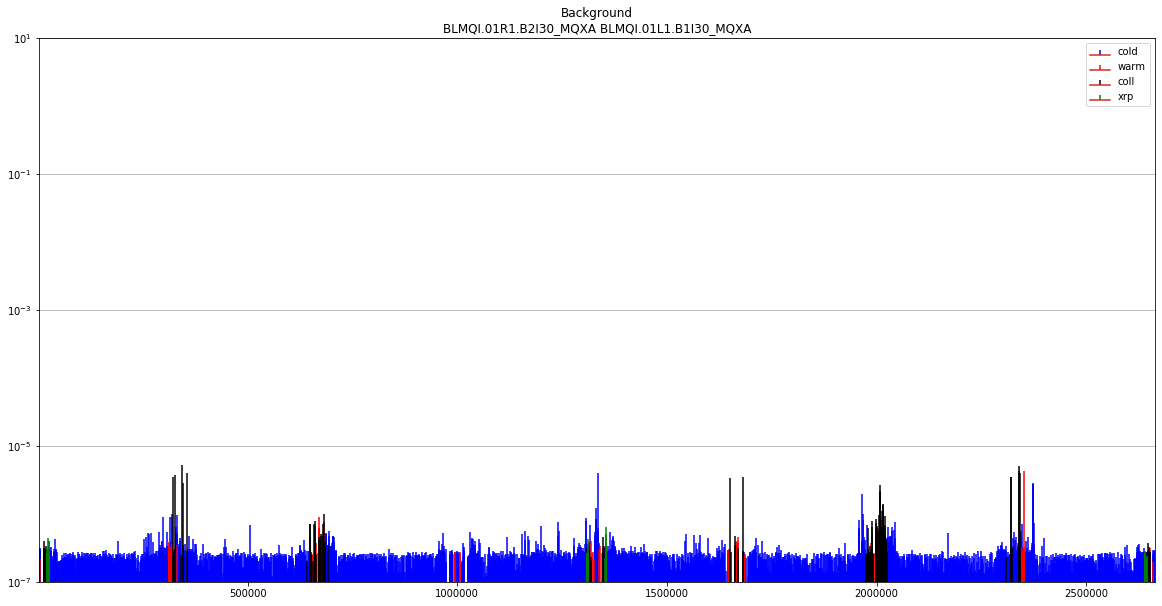

In [6]:
for trigger in ts:
    t = pd.to_datetime(trigger['datetime']).tz_localize('Europe/Zurich')
    BLM_data = fetcher.from_datetimes(t - look_back,
                                      t + look_forward)
    BLM_data.plot()
    BLM_bg = fetcher.bg_from_ADT_trigger(t,
                                         min_bg_dt='20S',
                                         look_back='2H',
                                         dt_prior='0S',
                                         dt_post='2S')   

    LM = BLM_data.loss_map(datetime=t, background=BLM_bg.df.mean())
    LM_clean = LM.clean_background().normalize()
    
    LM_clean.beam(trigger['beam']).plot(title=f'{t} B{trigger["beam"]}')
    LM_clean.beam(trigger['beam']).IR(7).plot(title=f'{t} B{trigger["beam"]}')
    LM_clean.beam(trigger['beam']).IR(7).TCP(HVS=True).plot(title=f'{t} B{trigger["beam"]}',
                                                            x_lim=[2000000, 2040000])
    display(LM_clean.beam(trigger['beam']).IR(7).TCP(HVS=True).df)
    
    LM_bg = LM_clean.get_background()
    LM_bg.plot(title=f'Background\n{LM_bg.df.index[0]} {LM_bg.df.index[-1]}')
    plt.show()